##Assignment 2: Gen AI and it's Applications

#Name: Sijjil Shabbir
#CMS ID: 452131

Installing Required Libraries

In [1]:
# Install dependencies
!pip install torch torchvision numpy matplotlib kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Binding Google Drive and Uploading kaggle api

In [2]:
# Authenticate Kaggle API (upload your Kaggle API JSON key)
from google.colab import files
files.upload()  # Upload kaggle.json file

# Move kaggle.json to the correct folder and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Downloading the Pokemon Dataset from Kaggle (This dataset contains 7000 pokemon Images)

In [4]:
!kaggle datasets download -d lantian773030/pokemonclassification -p "/content/drive/MyDrive/PokemonDataset"

# Unzip inside Google Drive
!unzip "/content/drive/MyDrive/PokemonDataset/pokemonclassification.zip" -d "/content/drive/MyDrive/PokemonDataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/PokemonDataset/PokemonData/Golbat/78bb8cd2828f40158fc0dcd4c0366a57.jpg  
  inflating: /content/drive/MyDrive/PokemonDataset/PokemonData/Golbat/7b7a064d3a1b4c53a9be936d4e4e3bab.jpg  
  inflating: /content/drive/MyDrive/PokemonDataset/PokemonData/Golbat/7d07fd6776fb40e9986a1a0f62233325.jpg  
  inflating: /content/drive/MyDrive/PokemonDataset/PokemonData/Golbat/815b279060b94e12a6b35d434a5250c2.jpg  
  inflating: /content/drive/MyDrive/PokemonDataset/PokemonData/Golbat/818014085ff04885b31eb5e8737012f2.jpg  
  inflating: /content/drive/MyDrive/PokemonDataset/PokemonData/Golbat/87529331a47b4a5cb5d10a6b3ea46d84.jpg  
  inflating: /content/drive/MyDrive/PokemonDataset/PokemonData/Golbat/914fab74d32e49a98940d5ba7f674fa6.jpg  
  inflating: /content/drive/MyDrive/PokemonDataset/PokemonData/Golbat/949a05bd0ad44be993e5fd89a8f582df.jpg  
  inflating: /content/drive/MyDrive/PokemonDataset/PokemonData/Golbat/9a4c793

Creating DataLoader and Visualizing the Data

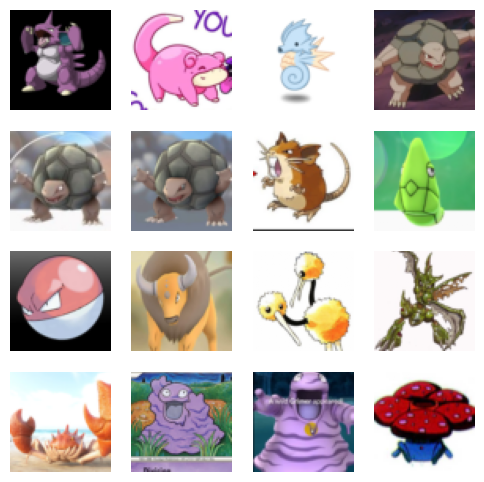

In [5]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset path (modify if needed)
dataset_path = "/content/drive/MyDrive/PokemonDataset"

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),         # Convert to Tensor
    transforms.Normalize([0.5], [0.5])  # Normalize to range [-1, 1]
])

# Load dataset
dataset = ImageFolder(root=dataset_path, transform=transform)

# Create DataLoader
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Function to visualize a few images
def show_images(dataloader, num_images=16):
    data_iter = iter(dataloader)
    images, _ = next(data_iter)
    images = images[:num_images]

    fig, axes = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axes.flatten()):
        img = images[i].permute(1, 2, 0) * 0.5 + 0.5  # Denormalize
        ax.imshow(img)
        ax.axis("off")
    plt.show()

# Show sample images
show_images(dataloader)


##Generator Model

In [6]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Define latent space size
latent_dim = 100
generator = Generator(latent_dim)
print(generator)

Generator(
  (model): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

##Discriminator Model

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

discriminator = Discriminator()
print(discriminator)


Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


##Model Training

In [8]:
import torch.optim as optim

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move models to device
generator.to(device)
discriminator.to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizers
lr = 0.0002  # Learning rate
beta1 = 0.5  # Momentum term
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

Using device: cuda


Epoch [1/100] | D Loss: 0.4784 | G Loss: 3.9206 | Time: 59.83s
Epoch [2/100] | D Loss: 1.1814 | G Loss: 3.9629 | Time: 58.02s
Epoch [3/100] | D Loss: 0.6947 | G Loss: 4.2828 | Time: 58.94s
Epoch [4/100] | D Loss: 0.5933 | G Loss: 3.4236 | Time: 57.06s
Epoch [5/100] | D Loss: 0.7969 | G Loss: 1.9641 | Time: 54.63s
Epoch [6/100] | D Loss: 1.0821 | G Loss: 5.3281 | Time: 54.91s
Epoch [7/100] | D Loss: 0.6428 | G Loss: 5.1086 | Time: 55.29s
Epoch [8/100] | D Loss: 0.7267 | G Loss: 3.4122 | Time: 55.15s
Epoch [9/100] | D Loss: 0.3617 | G Loss: 3.5303 | Time: 54.35s
Epoch [10/100] | D Loss: 0.5352 | G Loss: 4.1803 | Time: 54.43s


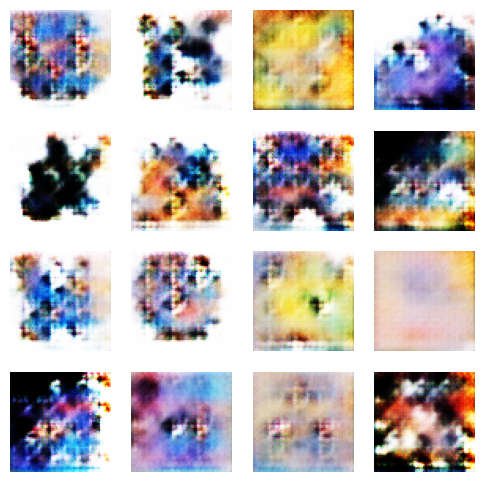

Epoch [11/100] | D Loss: 0.3538 | G Loss: 4.1279 | Time: 54.23s
Epoch [12/100] | D Loss: 0.5192 | G Loss: 4.8662 | Time: 54.57s
Epoch [13/100] | D Loss: 0.2063 | G Loss: 4.0520 | Time: 54.74s
Epoch [14/100] | D Loss: 0.3309 | G Loss: 2.9234 | Time: 55.39s
Epoch [15/100] | D Loss: 0.4265 | G Loss: 2.9648 | Time: 54.51s
Epoch [16/100] | D Loss: 0.5330 | G Loss: 4.3578 | Time: 54.48s
Epoch [17/100] | D Loss: 0.3074 | G Loss: 2.0954 | Time: 54.10s
Epoch [18/100] | D Loss: 1.1377 | G Loss: 5.2847 | Time: 54.11s
Epoch [19/100] | D Loss: 0.5128 | G Loss: 6.6663 | Time: 54.63s
Epoch [20/100] | D Loss: 0.3310 | G Loss: 3.2397 | Time: 54.25s


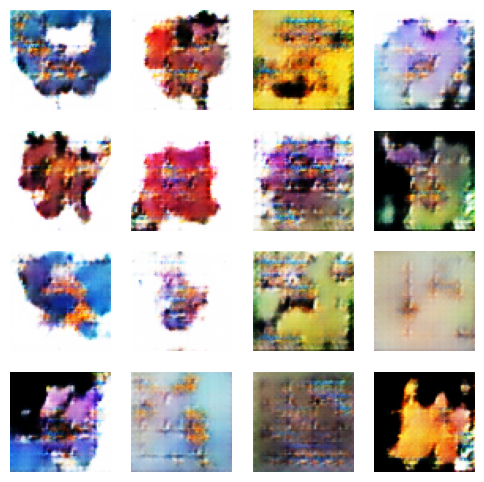

Epoch [21/100] | D Loss: 0.2062 | G Loss: 4.0880 | Time: 54.81s
Epoch [22/100] | D Loss: 0.2128 | G Loss: 4.7807 | Time: 54.53s
Epoch [23/100] | D Loss: 0.5236 | G Loss: 6.1807 | Time: 54.30s
Epoch [24/100] | D Loss: 0.2602 | G Loss: 5.1057 | Time: 53.99s
Epoch [25/100] | D Loss: 0.1728 | G Loss: 3.5391 | Time: 54.55s
Epoch [26/100] | D Loss: 0.2978 | G Loss: 2.5930 | Time: 54.32s
Epoch [27/100] | D Loss: 0.7261 | G Loss: 3.0883 | Time: 54.46s
Epoch [28/100] | D Loss: 0.4595 | G Loss: 6.7941 | Time: 54.84s
Epoch [29/100] | D Loss: 0.3940 | G Loss: 6.5293 | Time: 54.84s
Epoch [30/100] | D Loss: 0.5187 | G Loss: 1.1056 | Time: 54.47s


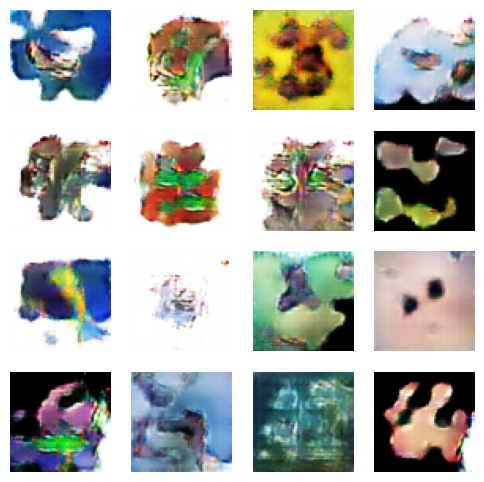

Epoch [31/100] | D Loss: 0.2386 | G Loss: 4.2487 | Time: 54.53s
Epoch [32/100] | D Loss: 0.8383 | G Loss: 0.7739 | Time: 53.90s
Epoch [33/100] | D Loss: 1.9675 | G Loss: 2.3128 | Time: 53.90s
Epoch [34/100] | D Loss: 0.2296 | G Loss: 2.9239 | Time: 54.48s
Epoch [35/100] | D Loss: 0.3920 | G Loss: 5.6841 | Time: 54.70s
Epoch [36/100] | D Loss: 0.1885 | G Loss: 3.7007 | Time: 55.12s
Epoch [37/100] | D Loss: 0.1661 | G Loss: 3.6218 | Time: 54.27s
Epoch [38/100] | D Loss: 0.1912 | G Loss: 2.9857 | Time: 54.10s
Epoch [39/100] | D Loss: 0.0729 | G Loss: 4.6771 | Time: 54.29s
Epoch [40/100] | D Loss: 0.1939 | G Loss: 2.5071 | Time: 53.75s


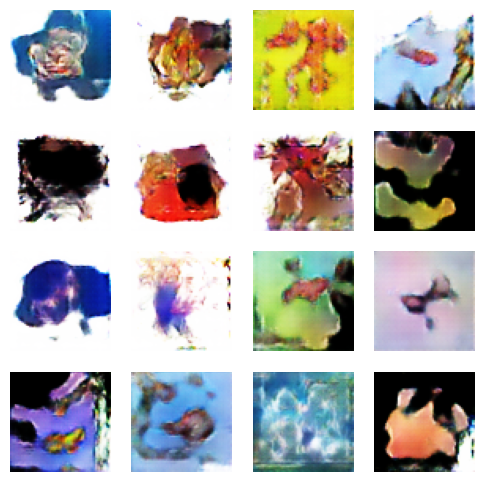

Epoch [41/100] | D Loss: 0.2092 | G Loss: 4.7606 | Time: 53.96s
Epoch [42/100] | D Loss: 0.1846 | G Loss: 3.4612 | Time: 54.92s
Epoch [43/100] | D Loss: 0.2147 | G Loss: 4.0303 | Time: 54.83s
Epoch [44/100] | D Loss: 0.5428 | G Loss: 4.8761 | Time: 54.80s
Epoch [45/100] | D Loss: 0.2593 | G Loss: 4.1265 | Time: 54.11s
Epoch [46/100] | D Loss: 0.8333 | G Loss: 7.4262 | Time: 54.55s
Epoch [47/100] | D Loss: 0.1352 | G Loss: 5.7170 | Time: 54.16s
Epoch [48/100] | D Loss: 0.0663 | G Loss: 4.4235 | Time: 54.30s
Epoch [49/100] | D Loss: 0.1840 | G Loss: 5.0476 | Time: 54.47s
Epoch [50/100] | D Loss: 0.1285 | G Loss: 5.1347 | Time: 54.26s


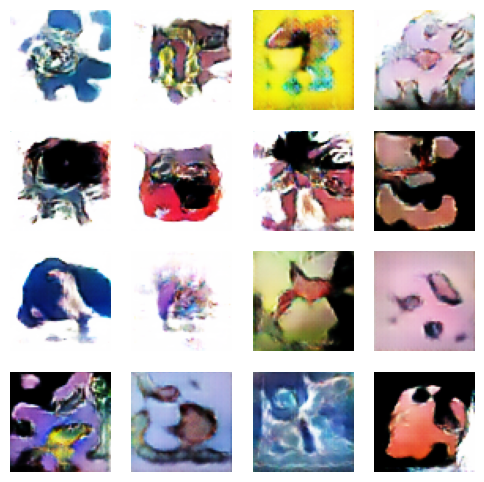

Epoch [51/100] | D Loss: 0.8773 | G Loss: 0.0774 | Time: 53.95s
Epoch [52/100] | D Loss: 0.0531 | G Loss: 4.4325 | Time: 54.09s
Epoch [53/100] | D Loss: 0.1640 | G Loss: 4.6031 | Time: 54.16s
Epoch [54/100] | D Loss: 0.1191 | G Loss: 4.1272 | Time: 54.31s
Epoch [55/100] | D Loss: 0.0673 | G Loss: 3.6203 | Time: 53.97s
Epoch [56/100] | D Loss: 0.1683 | G Loss: 3.4469 | Time: 54.15s
Epoch [57/100] | D Loss: 0.2752 | G Loss: 3.6640 | Time: 54.75s
Epoch [58/100] | D Loss: 0.1066 | G Loss: 4.6553 | Time: 54.78s
Epoch [59/100] | D Loss: 0.1177 | G Loss: 3.8299 | Time: 52.98s
Epoch [60/100] | D Loss: 0.0363 | G Loss: 5.2004 | Time: 54.12s


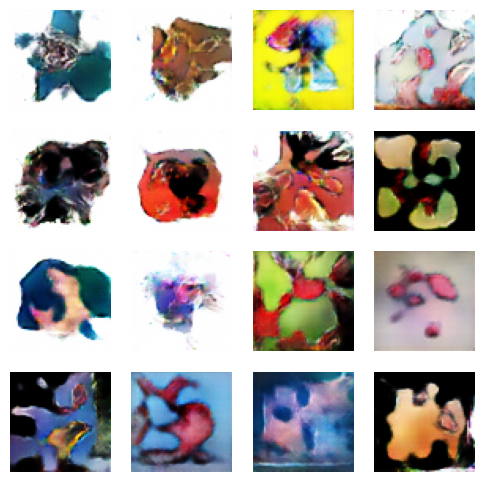

Epoch [61/100] | D Loss: 0.2392 | G Loss: 3.4110 | Time: 54.00s
Epoch [62/100] | D Loss: 0.0532 | G Loss: 4.7592 | Time: 54.09s
Epoch [63/100] | D Loss: 0.1570 | G Loss: 5.7296 | Time: 53.83s
Epoch [64/100] | D Loss: 0.2737 | G Loss: 4.7907 | Time: 53.92s
Epoch [65/100] | D Loss: 0.0438 | G Loss: 5.3457 | Time: 54.32s
Epoch [66/100] | D Loss: 0.0995 | G Loss: 3.9042 | Time: 54.02s
Epoch [67/100] | D Loss: 0.4452 | G Loss: 2.8910 | Time: 54.11s
Epoch [68/100] | D Loss: 0.1024 | G Loss: 4.6707 | Time: 53.97s
Epoch [69/100] | D Loss: 0.0277 | G Loss: 4.8334 | Time: 54.00s
Epoch [70/100] | D Loss: 0.5225 | G Loss: 8.3706 | Time: 53.82s


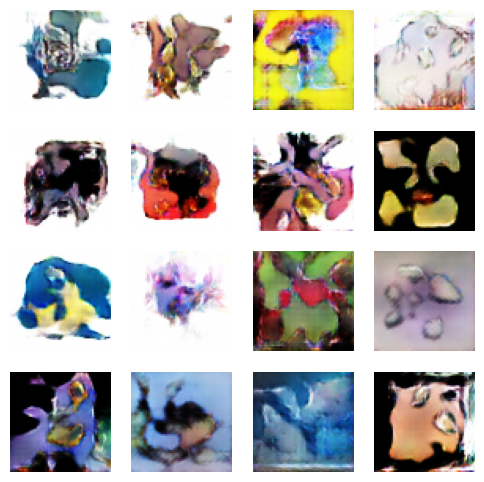

Epoch [71/100] | D Loss: 0.1820 | G Loss: 4.7060 | Time: 54.34s
Epoch [72/100] | D Loss: 0.0850 | G Loss: 4.9600 | Time: 54.28s
Epoch [73/100] | D Loss: 0.0813 | G Loss: 4.3336 | Time: 54.19s
Epoch [74/100] | D Loss: 0.5708 | G Loss: 6.8259 | Time: 54.66s
Epoch [75/100] | D Loss: 0.2481 | G Loss: 5.7489 | Time: 54.84s
Epoch [76/100] | D Loss: 0.1003 | G Loss: 4.1356 | Time: 54.82s
Epoch [77/100] | D Loss: 0.3068 | G Loss: 10.0647 | Time: 54.73s
Epoch [78/100] | D Loss: 0.0785 | G Loss: 3.9477 | Time: 54.31s
Epoch [79/100] | D Loss: 0.1398 | G Loss: 6.8046 | Time: 53.89s
Epoch [80/100] | D Loss: 0.1026 | G Loss: 3.7002 | Time: 55.02s


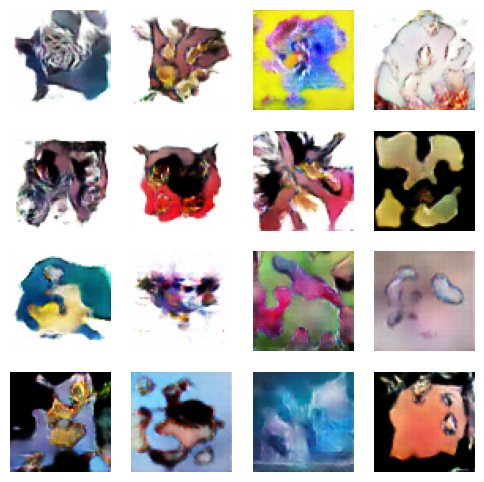

Epoch [81/100] | D Loss: 0.0330 | G Loss: 4.7307 | Time: 54.42s
Epoch [82/100] | D Loss: 0.0232 | G Loss: 6.6725 | Time: 54.53s
Epoch [83/100] | D Loss: 1.0717 | G Loss: 1.5785 | Time: 54.07s
Epoch [84/100] | D Loss: 0.1911 | G Loss: 6.2376 | Time: 53.85s
Epoch [85/100] | D Loss: 0.1283 | G Loss: 6.4294 | Time: 53.73s
Epoch [86/100] | D Loss: 0.3030 | G Loss: 5.9301 | Time: 54.02s
Epoch [87/100] | D Loss: 0.2943 | G Loss: 3.8755 | Time: 53.67s
Epoch [88/100] | D Loss: 0.0253 | G Loss: 6.1256 | Time: 54.80s
Epoch [89/100] | D Loss: 0.0623 | G Loss: 4.9833 | Time: 53.78s
Epoch [90/100] | D Loss: 0.0504 | G Loss: 6.4242 | Time: 53.87s


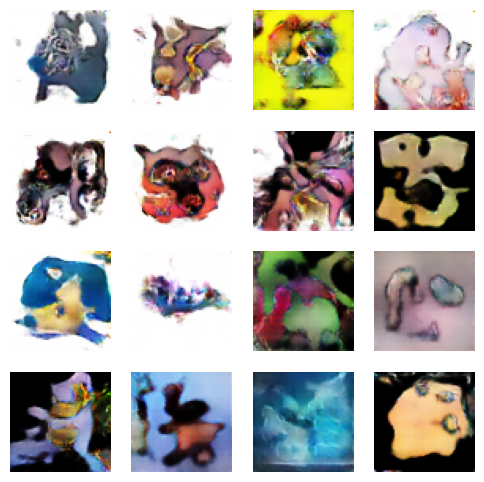

Epoch [91/100] | D Loss: 0.0142 | G Loss: 5.9105 | Time: 53.88s
Epoch [92/100] | D Loss: 0.1719 | G Loss: 6.9198 | Time: 54.36s
Epoch [93/100] | D Loss: 0.0643 | G Loss: 6.3499 | Time: 56.78s
Epoch [94/100] | D Loss: 0.0647 | G Loss: 4.7968 | Time: 59.77s
Epoch [95/100] | D Loss: 0.3376 | G Loss: 6.9125 | Time: 56.63s
Epoch [96/100] | D Loss: 0.0556 | G Loss: 5.4381 | Time: 57.03s
Epoch [97/100] | D Loss: 0.0478 | G Loss: 5.3477 | Time: 58.50s
Epoch [98/100] | D Loss: 0.0319 | G Loss: 5.6356 | Time: 56.41s
Epoch [99/100] | D Loss: 0.4403 | G Loss: 3.9210 | Time: 56.34s
Epoch [100/100] | D Loss: 0.0404 | G Loss: 5.6940 | Time: 54.88s


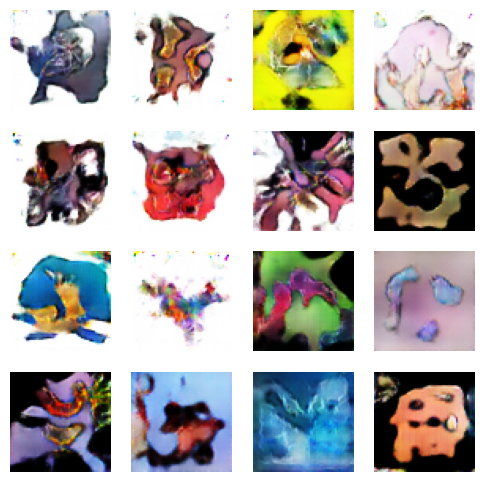

Training complete!


In [9]:
import time

# Hyperparameters
num_epochs = 100
latent_dim = 100

# Fixed noise for visualization
fixed_noise = torch.randn(16, latent_dim, 1, 1, device=device)

# Training loop
for epoch in range(num_epochs):
    start_time = time.time()

    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)

        # Labels for real and fake images
        real_labels = torch.ones(real_images.size(0), 1, device=device)
        fake_labels = torch.zeros(real_images.size(0), 1, device=device)

        # ---- Train Discriminator ----
        optimizer_D.zero_grad()

        # Real images loss
        real_outputs = discriminator(real_images).view(-1, 1)
        real_loss = criterion(real_outputs, real_labels)

        # Generate fake images
        z = torch.randn(real_images.size(0), latent_dim, 1, 1, device=device)
        fake_images = generator(z)

        # Fake images loss
        fake_outputs = discriminator(fake_images.detach()).view(-1, 1)
        fake_loss = criterion(fake_outputs, fake_labels)

        # Total loss for Discriminator
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # ---- Train Generator ----
        optimizer_G.zero_grad()

        # Generate new fake images
        fake_outputs = discriminator(fake_images).view(-1, 1)
        g_loss = criterion(fake_outputs, real_labels)  # Fool the discriminator

        g_loss.backward()
        optimizer_G.step()

    # Print progress
    elapsed_time = time.time() - start_time
    print(f"Epoch [{epoch+1}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f} | Time: {elapsed_time:.2f}s")

    # Save sample generated images every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            sample_images = generator(fixed_noise).detach().cpu()

        fig, axes = plt.subplots(4, 4, figsize=(6, 6))
        for i, ax in enumerate(axes.flatten()):
            img = sample_images[i].permute(1, 2, 0) * 0.5 + 0.5  # Denormalize
            ax.imshow(img)
            ax.axis("off")
        plt.show()

print("Training complete!")

Saving the Model

In [ ]:
# Define save paths
generator_path = "/content/drive/MyDrive/dcgan_generator.pth"
discriminator_path = "/content/drive/MyDrive/dcgan_discriminator.pth"

# Save models
torch.save(generator.state_dict(), generator_path)
torch.save(discriminator.state_dict(), discriminator_path)

print("Models saved successfully!")


Models saved successfully!


##Falsk App to use the Model

In [ ]:
!pip install flask flask-ngrok torch torchvision

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from flask import Flask, render_template, send_file
import io
import torchvision.utils as vutils
from PIL import Image
from flask_ngrok import run_with_ngrok  # Import ngrok for Colab

# Define Generator
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Load trained model
device = torch.device("cpu")
latent_dim = 100
generator = Generator(latent_dim).to(device)

try:
    generator.load_state_dict(torch.load("/content/drive/MyDrive/dcgan_generator.pth", map_location=device))
    generator.eval()
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Enable ngrok for Colab

@app.route("/generate")
def generate_image():
    noise = torch.randn(1, latent_dim, 1, 1, device=device)

    with torch.no_grad():
        fake_image = generator(noise).cpu()

    fake_image = (fake_image + 1) / 2  # Normalize to [0,1]
    img_pil = vutils.make_grid(fake_image, normalize=True).permute(1, 2, 0).numpy()
    img_pil = Image.fromarray((img_pil * 255).astype(np.uint8))

    img_io = io.BytesIO()
    img_pil.save(img_io, 'PNG')
    img_io.seek(0)

    return send_file(img_io, mimetype='image/png')

@app.route("/")
def home():
    return """<h1>Pokémon Generator</h1>
              <p>Click the button below to generate a Pokémon:</p>
              <a href='/generate'><button>Generate Pokémon</button></a>"""

if __name__ == "__main__":
    app.run()


✅ Model loaded successfully!
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://3608-34-125-164-153.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040
